In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Creating sample sales dataset
data = {
    "Order_Date": pd.date_range(start="2024-01-01", periods=200, freq="D"),
    "Product": np.random.choice(["Laptop", "Mobile", "Headphones", "Keyboard"], 200),
    "Region": np.random.choice(["North", "South", "East", "West"], 200),
    "Quantity": np.random.randint(1, 5, 200),
    "Price": np.random.randint(500, 50000, 200)
}

df = pd.DataFrame(data)
df["Revenue"] = df["Quantity"] * df["Price"]
df.head()


,Order_Date,Product,Region,Quantity,Price,Revenue
0,2024-01-01,Headphones,East,4,1376,5504
1,2024-01-02,Keyboard,West,4,32593,130372
2,2024-01-03,Laptop,East,3,4642,13926
3,2024-01-04,Headphones,North,1,15702,15702
4,2024-01-05,Headphones,West,4,40234,160936


In [2]:
total_revenue = df["Revenue"].sum()
average_order_value = df["Revenue"].mean()
top_region = df.groupby("Region")["Revenue"].sum().idxmax()

print("Total Revenue:", total_revenue)
print("Average Order Value:", average_order_value)
print("Top Region:", top_region)


Total Revenue: 12504896
Average Order Value: 62524.48
Top Region: West


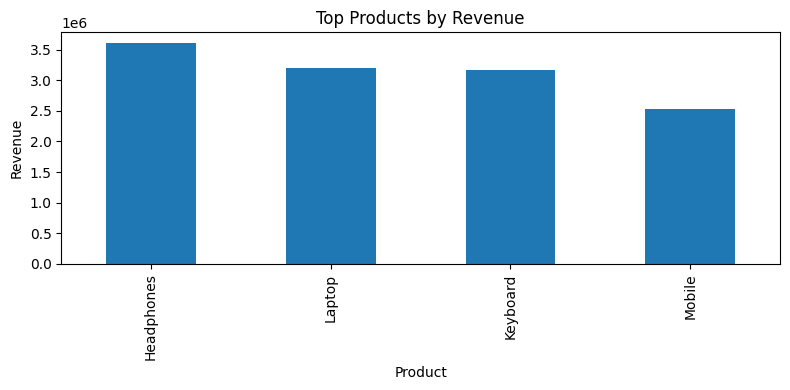

In [3]:
top_products = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
top_products.plot(kind="bar")
plt.title("Top Products by Revenue")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


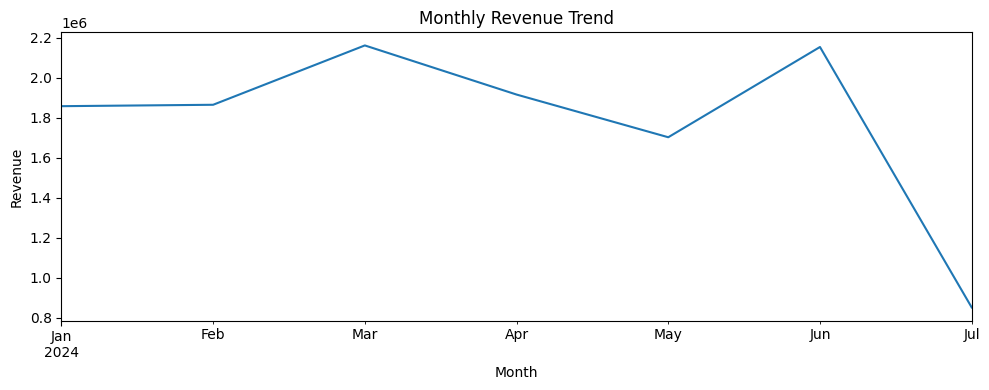

In [4]:
df["Month"] = df["Order_Date"].dt.to_period("M")
monthly_sales = df.groupby("Month")["Revenue"].sum()

plt.figure(figsize=(10,4))
monthly_sales.plot()
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


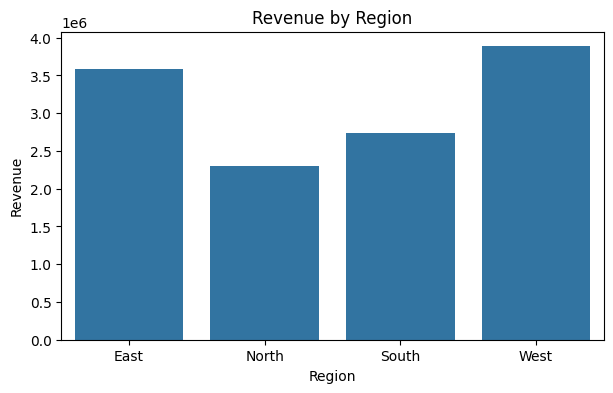

In [5]:
regional_sales = df.groupby("Region")["Revenue"].sum()

plt.figure(figsize=(7,4))
sns.barplot(x=regional_sales.index, y=regional_sales.values)
plt.title("Revenue by Region")
plt.ylabel("Revenue")
plt.show()
